# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import optuna
import warnings
warnings.filterwarnings('ignore')

C:\Users\Yehia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Dataset

In [2]:
url = "healthcare-dataset-stroke-data.csv"
stroke_data = pd.read_csv(url)

In [3]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. Data Exploration and Visualization

## 3.1 Data Analysis

In [4]:
print(stroke_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [5]:
print(stroke_data.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [6]:
print(stroke_data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


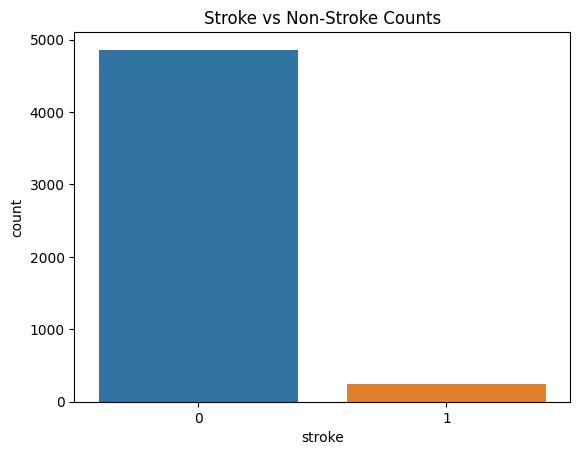

In [7]:
sns.countplot(x='stroke', data=stroke_data)
plt.title('Stroke vs Non-Stroke Counts')
plt.show()

## 3.2 Heatmap

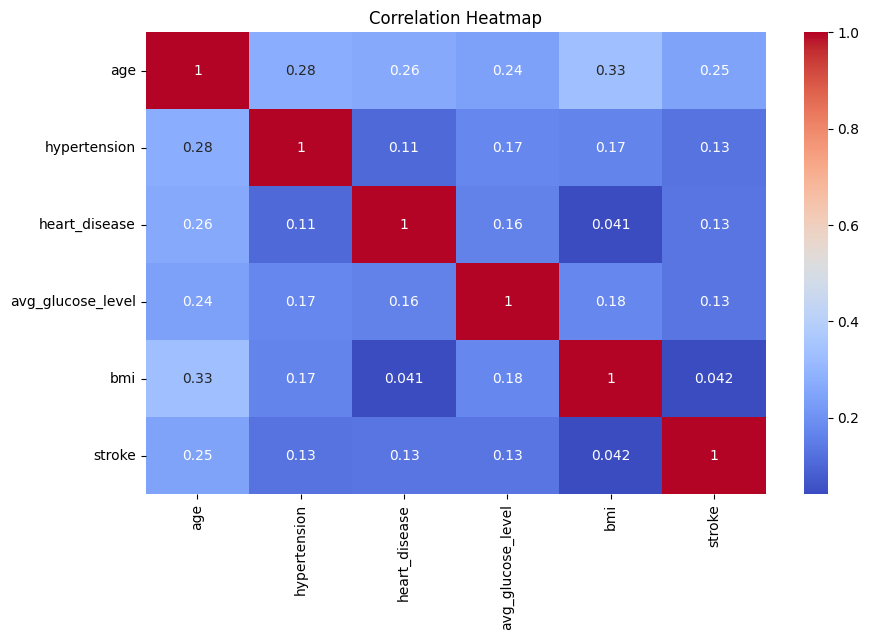

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(stroke_data.drop(columns=['id']).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 3.3 Pairplot on selected features

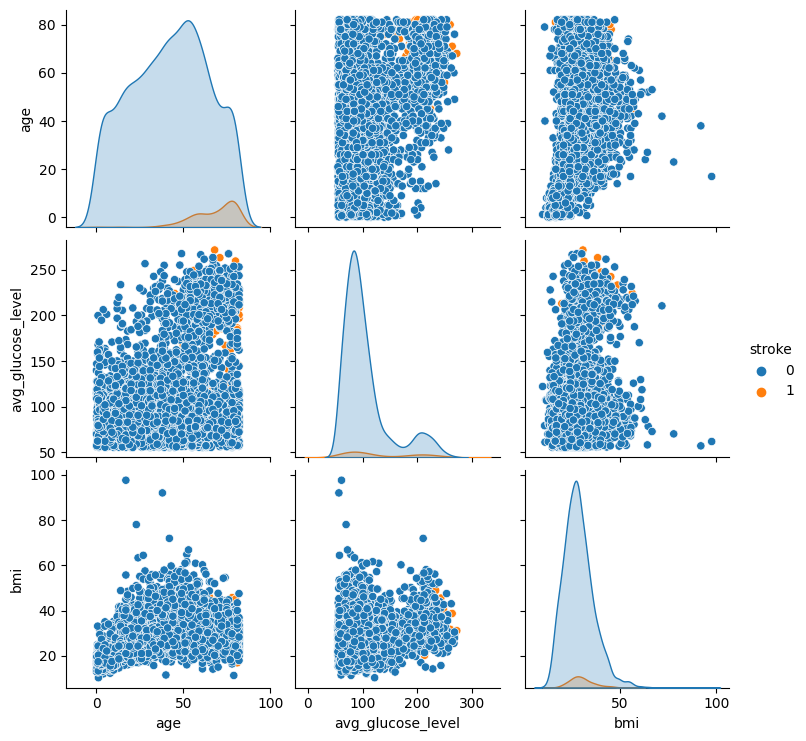

In [9]:
sns.pairplot(stroke_data, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
plt.show()

# 4. Data Cleaning and Preprocessing

In [10]:
#  Drop unnecessary columns and handle missing values
stroke_data.drop(['id'], axis=1, inplace=True)
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace=True)

In [11]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [12]:
# Remove incorrect values (age <= 1 or bmi <= 10 or avg_glucose_level <= 0)
stroke_data = stroke_data[(stroke_data['age'] >= 1) & (stroke_data['bmi'] > 10) & (stroke_data['avg_glucose_level'] > 0)]

In [13]:
# Remove outliers using IQR method for 'age', 'bmi', 'avg_glucose_level'
for col in ['age', 'bmi', 'avg_glucose_level']:
    Q1 = stroke_data[col].quantile(0.25)
    Q3 = stroke_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    stroke_data = stroke_data[(stroke_data[col] >= lower_bound) & (stroke_data[col] <= upper_bound)]

## 4.1 Encode categorical variables

In [14]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in categorical_cols:
    stroke_data[col] = le.fit_transform(stroke_data[col])

In [15]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## 4.2 Train-test split

In [16]:
# Split the data into training, validation, and test sets
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 60/20/20 split

In [17]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4879,1,3.00,0,0,0,4,1,81.88,18.0,0
3678,0,5.00,0,0,0,4,0,123.49,19.5,0
2413,0,58.00,0,0,1,2,0,100.42,39.5,3
2841,0,57.00,0,0,1,2,0,93.85,29.1,2
3424,1,66.00,0,0,1,2,0,81.11,28.8,1
...,...,...,...,...,...,...,...,...,...,...
4806,1,15.00,0,0,0,2,1,137.27,19.3,2
1134,1,1.56,0,0,0,4,0,93.74,20.1,0
1488,0,5.00,0,0,0,4,1,129.01,17.2,0
473,0,43.00,0,0,1,0,0,70.08,26.6,2


## 4.3 Normalization

In [18]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 5. Dimensionality Reduction

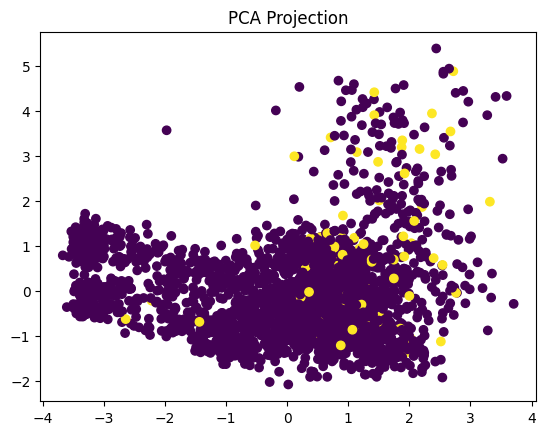

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.title('PCA Projection')
plt.show()

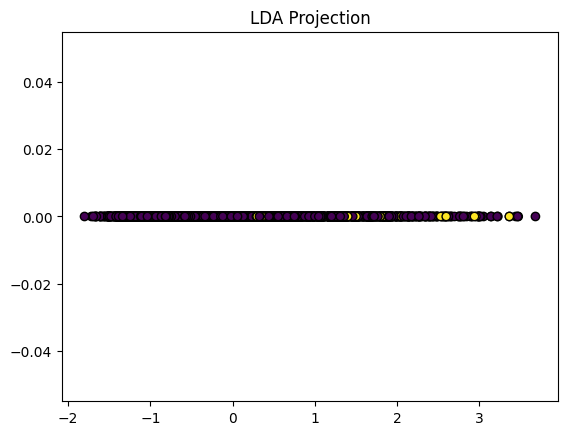

In [20]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_scaled, y_train)
plt.figure()
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_train, edgecolor='k')
plt.title('LDA Projection')
plt.show()

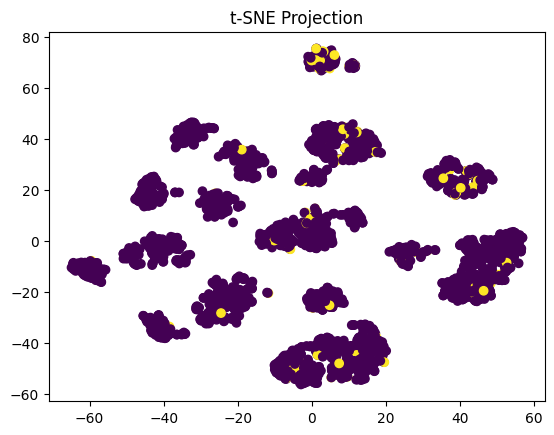

In [21]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
plt.title('t-SNE Projection')
plt.show()

# 6. Train Classifiers

## 6.1 Naive Bayes

In [22]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

## 6.2 SVM

In [23]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

### 6.2.1 Grid Search for SVM

Best SVM parameters: {'C': 100, 'kernel': 'sigmoid'}


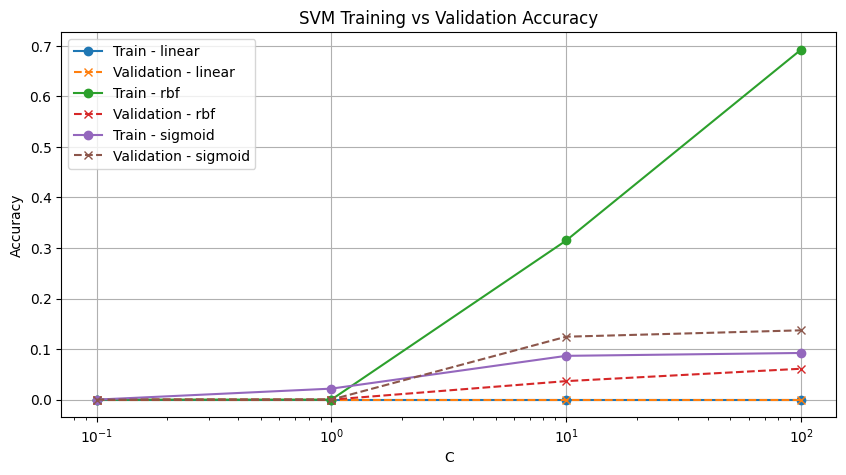

In [24]:
# Grid Search for SVM with accuracy plotting
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3, return_train_score=True, scoring= 'f1')
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_


print("Best SVM parameters:", svm_grid.best_params_)

# Plot training and validation accuracy for SVM
results_df = pd.DataFrame(svm_grid.cv_results_)
plt.figure(figsize=(10, 5))
for kernel in svm_params['kernel']:
    mask = results_df['param_kernel'] == kernel
    plt.plot(results_df[mask]['param_C'], results_df[mask]['mean_train_score'], label=f"Train - {kernel}", marker='o')
    plt.plot(results_df[mask]['param_C'], results_df[mask]['mean_test_score'], label=f"Validation - {kernel}", linestyle='--', marker='x')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

## 6.3 Optuna Search for Decision Tree

[I 2025-05-05 23:02:02,040] A new study created in memory with name: no-name-498c2067-2661-4e03-a19f-e9cb7b12df97
[I 2025-05-05 23:02:02,050] Trial 0 finished with value: 0.9390103567318757 and parameters: {'max_depth': 13, 'min_samples_split': 4}. Best is trial 0 with value: 0.9390103567318757.
[I 2025-05-05 23:02:02,060] Trial 1 finished with value: 0.9367088607594937 and parameters: {'max_depth': 20, 'min_samples_split': 6}. Best is trial 0 with value: 0.9390103567318757.
[I 2025-05-05 23:02:02,071] Trial 2 finished with value: 0.950517836593786 and parameters: {'max_depth': 8, 'min_samples_split': 3}. Best is trial 2 with value: 0.950517836593786.
[I 2025-05-05 23:02:02,080] Trial 3 finished with value: 0.9436133486766398 and parameters: {'max_depth': 10, 'min_samples_split': 6}. Best is trial 2 with value: 0.950517836593786.
[I 2025-05-05 23:02:02,090] Trial 4 finished with value: 0.9367088607594937 and parameters: {'max_depth': 15, 'min_samples_split': 2}. Best is trial 2 with va

Best parameters from Optuna: {'max_depth': 5, 'min_samples_split': 9}


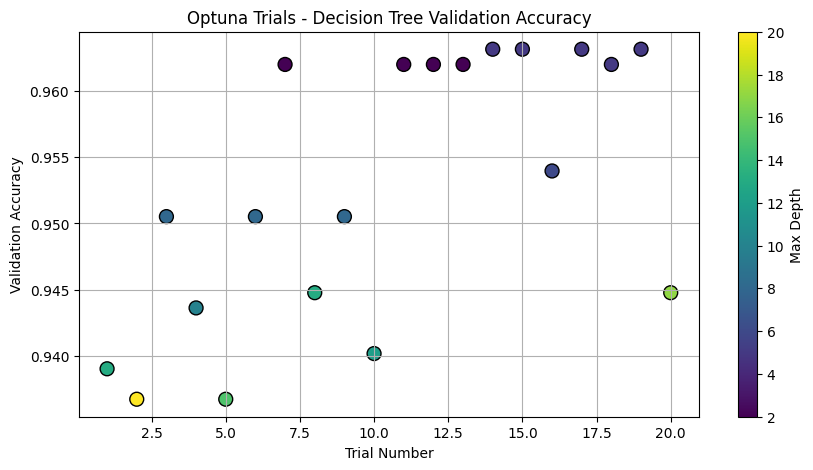

In [25]:
# Optuna Search for Decision Tree
optuna_scores = []
optuna_params = []

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    clf.fit(X_train_scaled, y_train)
    val_score = clf.score(X_val_scaled, y_val)
    optuna_scores.append(val_score)
    optuna_params.append((max_depth, min_samples_split))
    return val_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

print("Best parameters from Optuna:", best_params)
# Plot Decision Tree validation accuracy from Optuna trials
depths = [p[0] for p in optuna_params]
splits = [p[1] for p in optuna_params]
plt.figure(figsize=(10, 5))
plt.scatter(range(1, len(optuna_scores)+1), optuna_scores, c=depths, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label='Max Depth')
plt.title('Optuna Trials - Decision Tree Validation Accuracy')
plt.xlabel('Trial Number')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# 6.4 KNN

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# 6.5 Decision Tree

In [27]:
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=9)

# 7. Testing and Evaluation


Naive Bayes Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       836
           1       0.16      0.36      0.22        33

    accuracy                           0.90       869
   macro avg       0.57      0.64      0.59       869
weighted avg       0.94      0.90      0.92       869



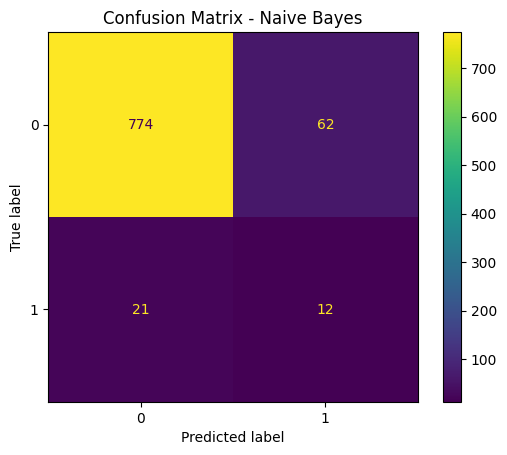


SVM Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       836
           1       0.00      0.00      0.00        33

    accuracy                           0.96       869
   macro avg       0.48      0.50      0.49       869
weighted avg       0.93      0.96      0.94       869



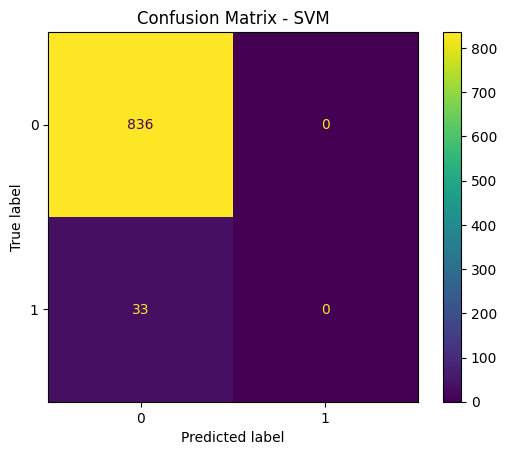


Grid-Search SVM Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       836
           1       0.09      0.09      0.09        33

    accuracy                           0.93       869
   macro avg       0.53      0.53      0.53       869
weighted avg       0.93      0.93      0.93       869



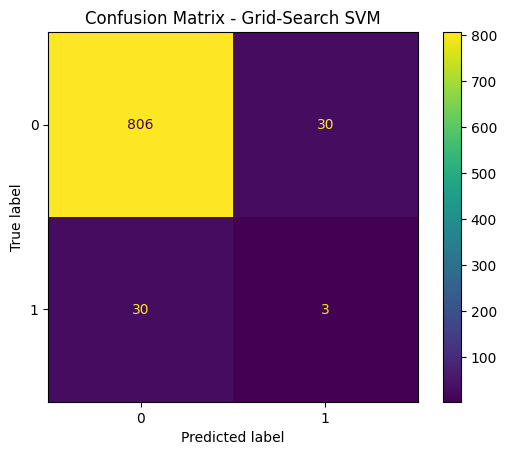


KNN Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       836
           1       0.14      0.03      0.05        33

    accuracy                           0.96       869
   macro avg       0.55      0.51      0.51       869
weighted avg       0.93      0.96      0.94       869



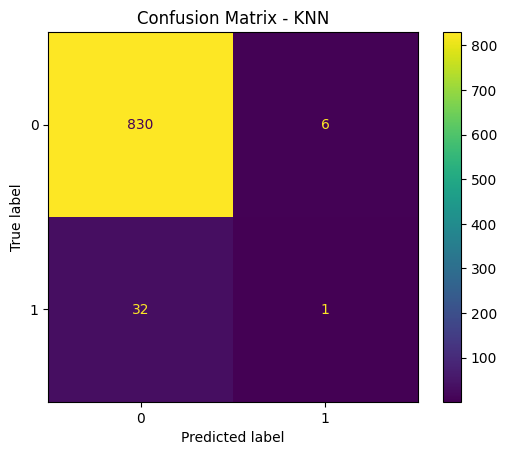


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       836
           1       0.21      0.09      0.13        33

    accuracy                           0.95       869
   macro avg       0.59      0.54      0.55       869
weighted avg       0.94      0.95      0.94       869



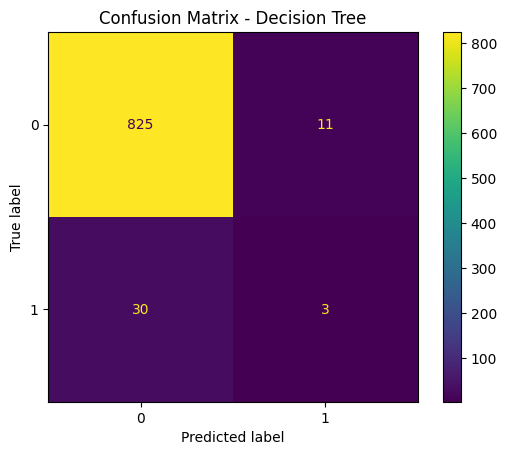

In [28]:
models = {
    "Naive Bayes": nb,
    "SVM": svm,
    "Grid-Search SVM": best_svm,
    "KNN": knn,
    "Decision Tree": dt
}

for name, model in models.items():
    print(f"\n{name} Evaluation:")
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.904488,0.162162,0.363636,0.224299
4,Decision Tree,0.952819,0.214286,0.090909,0.127660
2,Grid-Search SVM,0.930955,0.090909,0.090909,0.090909
3,KNN,0.956272,0.142857,0.030303,0.050000
1,SVM,0.962025,0.000000,0.000000,0.000000


<Figure size 1200x600 with 0 Axes>

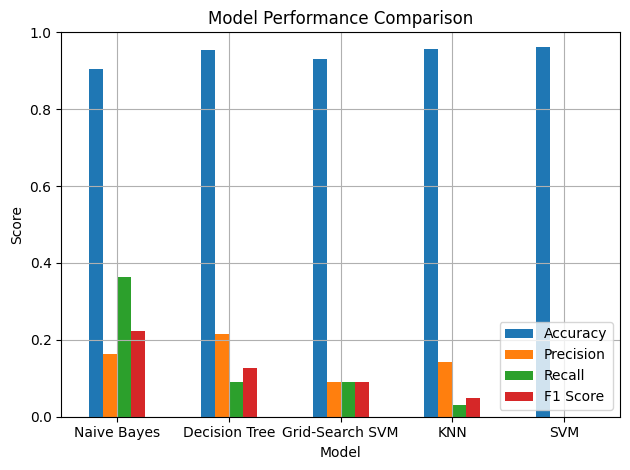

In [29]:
# Collect evaluation scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, zero_division=0))
    metrics['Recall'].append(recall_score(y_test, y_pred, zero_division=0))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, zero_division=0))

# Convert to DataFrame for display
metrics_df = pd.DataFrame(metrics)
metrics_df.sort_values(by='F1 Score', ascending=False, inplace=True)
display(metrics_df)

# Plot performance comparison
plt.figure(figsize=(12, 6))
metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()




# 8. Clustering

## 8.1 Hierarchical Clustering

In [ ]:
linked = linkage(X_train_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram - Hierarchical Clustering')
plt.show()

Stroke rate per hierarchical cluster:
 hierarchical_cluster
0    0.012922
1    0.043019
2    0.138614
3    0.085714
Name: stroke, dtype: float64


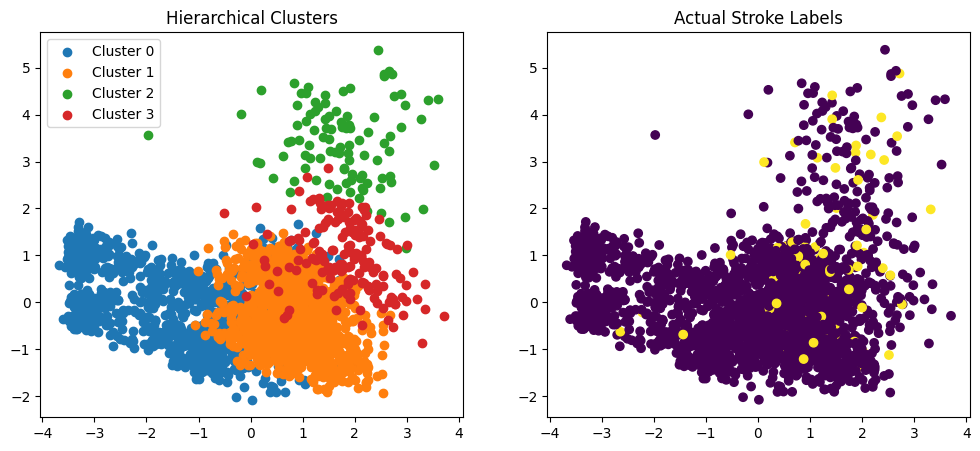

In [ ]:
# Apply hierarchical clustering with a specific number of clusters
from sklearn.cluster import AgglomerativeClustering

# Based on dendrogram, choose an appropriate number of clusters (4)
n_clusters = 4
hier_cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
hier_labels = hier_cluster.fit_predict(X_train_scaled)

# Create dataframe with hierarchical cluster labels
X_train_hier = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_hier['hierarchical_cluster'] = hier_labels
X_train_hier['stroke'] = y_train.values

# Analyze stroke rates by hierarchical cluster
hier_stroke_rates = X_train_hier.groupby('hierarchical_cluster')['stroke'].mean()
print("Stroke rate per hierarchical cluster:\n", hier_stroke_rates)

# Visualize hierarchical clusters with dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for cluster in range(n_clusters):
    plt.scatter(X_pca[hier_labels == cluster, 0], X_pca[hier_labels == cluster, 1], 
                label=f'Cluster {cluster}')
plt.title('Hierarchical Clusters')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title('Actual Stroke Labels')
plt.show()

## 8.2 KMeans Clustering

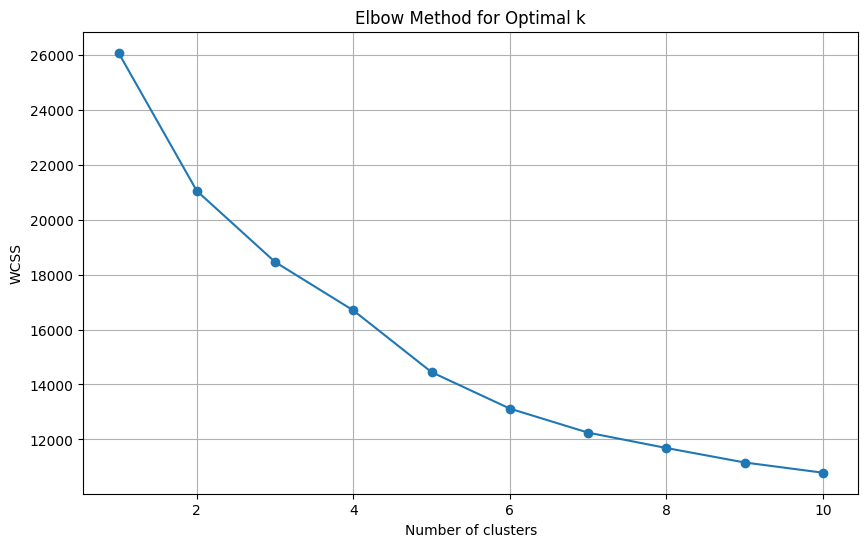

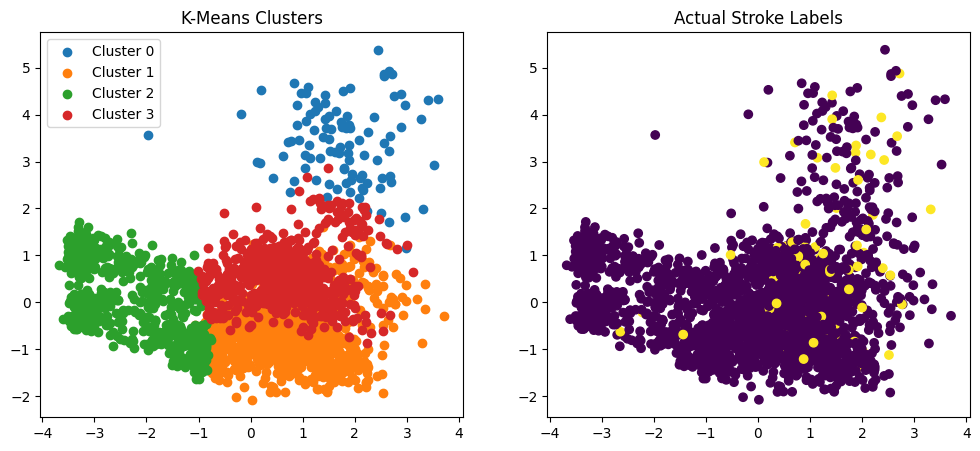

In [ ]:
# Elbow method to find optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Choose optimal k based on elbow method (4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)

# Better visualization using PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for cluster in range(optimal_k):
    plt.scatter(X_pca[kmeans_labels == cluster, 0], X_pca[kmeans_labels == cluster, 1], 
                label=f'Cluster {cluster}')
plt.title('K-Means Clusters')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title('Actual Stroke Labels')
plt.show()

In [ ]:
# 1. ANALYZE STROKE RATES BY CLUSTER

# For K-means clusters
kmeans_stroke_analysis = pd.DataFrame({
    'kmeans_cluster': kmeans_labels,
    'stroke': y_train.values
})

kmeans_stroke_rates = kmeans_stroke_analysis.groupby('kmeans_cluster')['stroke'].agg(['mean', 'count'])
kmeans_stroke_rates.columns = ['Stroke Rate', 'Cluster Size']
kmeans_stroke_rates['Stroke Rate'] = kmeans_stroke_rates['Stroke Rate'] * 100

print("\nK-means Clusters - Stroke Risk Analysis:")
display(kmeans_stroke_rates.sort_values('Stroke Rate', ascending=False))

# For Hierarchical clusters
hier_stroke_analysis = pd.DataFrame({
    'hierarchical_cluster': hier_labels,
    'stroke': y_train.values
})

hier_stroke_rates = hier_stroke_analysis.groupby('hierarchical_cluster')['stroke'].agg(['mean', 'count'])
hier_stroke_rates.columns = ['Stroke Rate', 'Cluster Size']
hier_stroke_rates['Stroke Rate'] = hier_stroke_rates['Stroke Rate'] * 100

print("\nHierarchical Clusters - Stroke Risk Analysis:")
display(hier_stroke_rates.sort_values('Stroke Rate', ascending=False))

# 2. IDENTIFY KEY CHARACTERISTICS OF HIGH-RISK CLUSTERS

# Add cluster assignments to original features
features_with_clusters = pd.DataFrame(X_train)
features_with_clusters.columns = X.columns
features_with_clusters['kmeans_cluster'] = kmeans_labels
features_with_clusters['hierarchical_cluster'] = hier_labels

# Get mean values by cluster
kmeans_profiles = features_with_clusters.groupby('kmeans_cluster').mean()
hier_profiles = features_with_clusters.groupby('hierarchical_cluster').mean()

# Identify high-risk clusters
kmeans_high_risk = kmeans_stroke_rates[kmeans_stroke_rates['Stroke Rate'] > kmeans_stroke_rates['Stroke Rate'].mean()].index.tolist()
hier_high_risk = hier_stroke_rates[hier_stroke_rates['Stroke Rate'] > hier_stroke_rates['Stroke Rate'].mean()].index.tolist()

print(f"\nHigh-risk K-means clusters: {kmeans_high_risk}")
print(f"High-risk Hierarchical clusters: {hier_high_risk}")

# 3. PROFILE HIGH-RISK CLUSTERS

# Function to get feature profile for a high-risk cluster
def profile_high_risk_cluster(cluster_id, profiles, stroke_rates, method="K-means"):
    # Basic information
    rate = stroke_rates.loc[cluster_id, 'Stroke Rate']
    size = stroke_rates.loc[cluster_id, 'Cluster Size']
    
    print(f"\n{method} Cluster {cluster_id} - Stroke Rate: {rate:.1f}%, Size: {size} patients")
    
    # Get profile and sort by most distinctive values
    profile = profiles.loc[cluster_id]
    
    # Calculate z-scores to identify distinctive features
    z_scores = (profile - profiles.mean()) / profiles.std()
    distinctive_features = z_scores.sort_values(ascending=False)
    
    print("Key characteristics:")
    for feature, z_score in distinctive_features.head(5).items():
        actual_value = profile[feature]
        avg_value = profiles[feature].mean()
        diff_pct = ((actual_value - avg_value) / avg_value) * 100 if avg_value != 0 else 0
        print(f"  • {feature}: {actual_value:.2f} ({diff_pct:+.1f}% vs. avg)")

# Profile all high-risk clusters
print("\n==== HIGH-RISK CLUSTER PROFILES ====")
for cluster in kmeans_high_risk:
    profile_high_risk_cluster(cluster, kmeans_profiles, kmeans_stroke_rates, "K-means")

for cluster in hier_high_risk:
    profile_high_risk_cluster(cluster, hier_profiles, hier_stroke_rates, "Hierarchical")

# 4. CLINICAL SUMMARY OF RISK PATTERNS

print("\n==== CLINICAL INSIGHTS FROM CLUSTERING ====")
print("Key stroke risk patterns identified:")

# Analyze k-means risk patterns
for i, cluster in enumerate(kmeans_high_risk):
    profile = kmeans_profiles.loc[cluster]
    rate = kmeans_stroke_rates.loc[cluster, 'Stroke Rate']
    
    # Simplified risk pattern description
    risk_factors = []
    
    if 'age' in profile and profile['age'] > kmeans_profiles['age'].mean():
        risk_factors.append("older age")
    
    if 'hypertension' in profile and profile['hypertension'] > kmeans_profiles['hypertension'].mean():
        risk_factors.append("hypertension")
        
    if 'heart_disease' in profile and profile['heart_disease'] > kmeans_profiles['heart_disease'].mean():
        risk_factors.append("heart disease")
    
    if 'avg_glucose_level' in profile and profile['avg_glucose_level'] > kmeans_profiles['avg_glucose_level'].mean():
        risk_factors.append("elevated glucose")
    
    risk_pattern = ", ".join(risk_factors) if risk_factors else "no dominant factors"
    
    print(f"Risk Pattern {i+1}: {rate:.1f}% stroke rate - characterized by {risk_pattern}")


K-means Clusters - Stroke Risk Analysis:


,Stroke Rate,Cluster Size
kmeans_cluster,,
0,13.861386,101
3,4.539007,705
1,4.420866,1131
2,0.447761,670



Hierarchical Clusters - Stroke Risk Analysis:


,Stroke Rate,Cluster Size
hierarchical_cluster,,
2,13.861386,101
3,8.571429,175
1,4.301887,1325
0,1.292247,1006



High-risk K-means clusters: [0]
High-risk Hierarchical clusters: [2, 3]

==== HIGH-RISK CLUSTER PROFILES ====

K-means Cluster 0 - Stroke Rate: 13.9%, Size: 101 patients
Key characteristics:
  • heart_disease: 1.00 (+300.0% vs. avg)
  • hierarchical_cluster: 2.00 (+99.3% vs. avg)
  • hypertension: 0.17 (+86.0% vs. avg)
  • age: 67.50 (+48.6% vs. avg)
  • ever_married: 0.89 (+36.8% vs. avg)

Hierarchical Cluster 2 - Stroke Rate: 13.9%, Size: 101 patients
Key characteristics:
  • heart_disease: 1.00 (+300.0% vs. avg)
  • gender: 0.58 (+29.4% vs. avg)
  • age: 67.50 (+33.8% vs. avg)
  • ever_married: 0.89 (+24.4% vs. avg)
  • smoking_status: 1.57 (+7.4% vs. avg)

Hierarchical Cluster 3 - Stroke Rate: 8.6%, Size: 175 patients
Key characteristics:
  • hypertension: 1.00 (+242.4% vs. avg)
  • bmi: 31.37 (+9.0% vs. avg)
  • smoking_status: 1.71 (+17.0% vs. avg)
  • age: 60.33 (+19.6% vs. avg)
  • kmeans_cluster: 1.83 (+32.9% vs. avg)

==== CLINICAL INSIGHTS FROM CLUSTERING ====
Key stroke ri

# 8.3 Compare clustering to true labels



==== K-means Cluster Alignment with Stroke Labels ====


,No Stroke (%),Stroke (%)
K-means Cluster,,
0,86.138614,13.861386
1,95.579134,4.420866
2,99.552239,0.447761
3,95.460993,4.539007


Overall cluster purity: 96.20%
Percentage of stroke cases captured in high-risk clusters: 14.14%


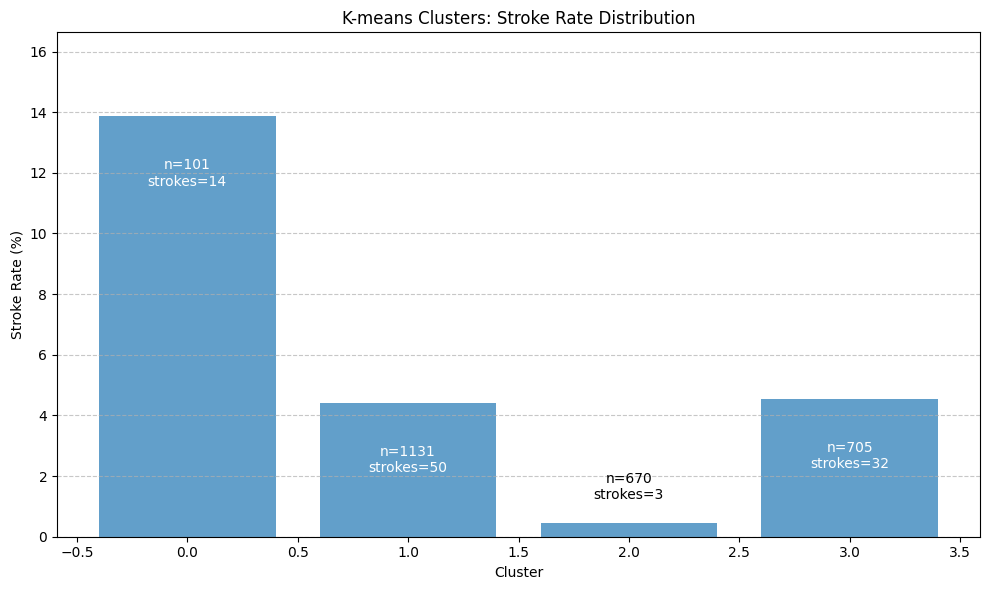


==== Hierarchical Cluster Alignment with Stroke Labels ====


,No Stroke (%),Stroke (%)
Hierarchical Cluster,,
0,98.707753,1.292247
1,95.698113,4.301887
2,86.138614,13.861386
3,91.428571,8.571429


Overall cluster purity: 96.20%
Percentage of stroke cases captured in high-risk clusters: 29.29%


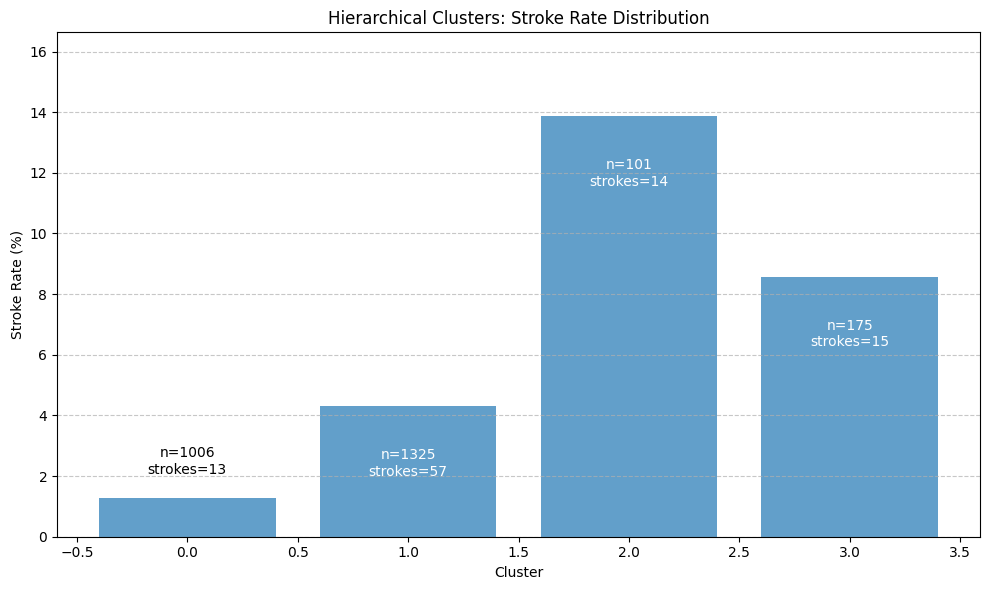

In [ ]:
# Create a combined dataset with cluster labels and true stroke status
comparison_df = pd.DataFrame({
    'kmeans_cluster': kmeans_labels,
    'hierarchical_cluster': hier_labels,
    'true_stroke': y_train.values
})

# Function to calculate and display cluster alignment with true labels
def analyze_cluster_alignment(comparison_df, cluster_col, method_name):
    print(f"\n==== {method_name} Cluster Alignment with Stroke Labels ====")
    
    # Contingency table/crosstab of clusters vs true labels
    contingency = pd.crosstab(
        comparison_df[cluster_col], 
        comparison_df['true_stroke'],
        rownames=[f'{method_name} Cluster'],
        colnames=['True Stroke Status'],
        normalize='index'
    ) * 100
    
    contingency.columns = ['No Stroke (%)', 'Stroke (%)']
    display(contingency)
    
    # Calculate cluster purity 
    cluster_sizes = comparison_df[cluster_col].value_counts()
    stroke_by_cluster = comparison_df.groupby(cluster_col)['true_stroke'].sum()
    max_class = comparison_df.groupby(cluster_col).apply(
        lambda x: max(x['true_stroke'].sum(), len(x) - x['true_stroke'].sum())
    )
    
    purity = (max_class.sum() / len(comparison_df)) * 100
    print(f"Overall cluster purity: {purity:.2f}%")
    
    # Calculate sensitivity for finding stroke cases
    stroke_cases = comparison_df['true_stroke'].sum()
    
    # Identify high-risk clusters (>5% stroke rate)
    high_risk_clusters = contingency[contingency['Stroke (%)'] > 5].index.tolist()
    
    # Calculate percentage of stroke cases captured in high-risk clusters
    stroke_in_high_risk = comparison_df[
        (comparison_df[cluster_col].isin(high_risk_clusters)) & 
        (comparison_df['true_stroke'] == 1)
    ].shape[0]
    
    sensitivity = (stroke_in_high_risk / stroke_cases) * 100 if stroke_cases > 0 else 0
    print(f"Percentage of stroke cases captured in high-risk clusters: {sensitivity:.2f}%")
    
    # Visualize distribution of stroke cases across clusters
    plt.figure(figsize=(10, 6))
    
    # Calculate stroke rate by cluster
    stroke_rates = comparison_df.groupby(cluster_col)['true_stroke'].mean() * 100
    cluster_counts = comparison_df[cluster_col].value_counts()
    
    # Create bar plot
    bars = plt.bar(stroke_rates.index, stroke_rates, alpha=0.7)
    
    # Find the maximum stroke rate for setting y-axis limit
    max_rate = stroke_rates.max()
    
    # Add cluster size as text - adjust position based on bar height
    for i, (cluster, rate) in enumerate(stroke_rates.items()):
        count = cluster_counts[cluster]
        stroke_count = comparison_df[(comparison_df[cluster_col] == cluster) & 
                                     (comparison_df['true_stroke'] == 1)].shape[0]
        
        # Position text based on bar height
        if rate < max_rate * 0.3:
            # For low bars, position text above the bar
            plt.text(i, rate + (max_rate * 0.05), f"n={count}\nstrokes={stroke_count}", 
                    ha='center', va='bottom')
        else:
            # For taller bars, position text inside the bar near the top
            plt.text(i, rate - (max_rate * 0.1), f"n={count}\nstrokes={stroke_count}", 
                    ha='center', va='top', color='white')
    
    plt.title(f'{method_name} Clusters: Stroke Rate Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Stroke Rate (%)')
    plt.ylim(0, max_rate * 1.2)  # Set y-axis limit with enough headroom for labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Analyze both clustering methods
analyze_cluster_alignment(comparison_df, 'kmeans_cluster', 'K-means')
analyze_cluster_alignment(comparison_df, 'hierarchical_cluster', 'Hierarchical')

# 8.4 Visualize Cluster Alignment with True Labels

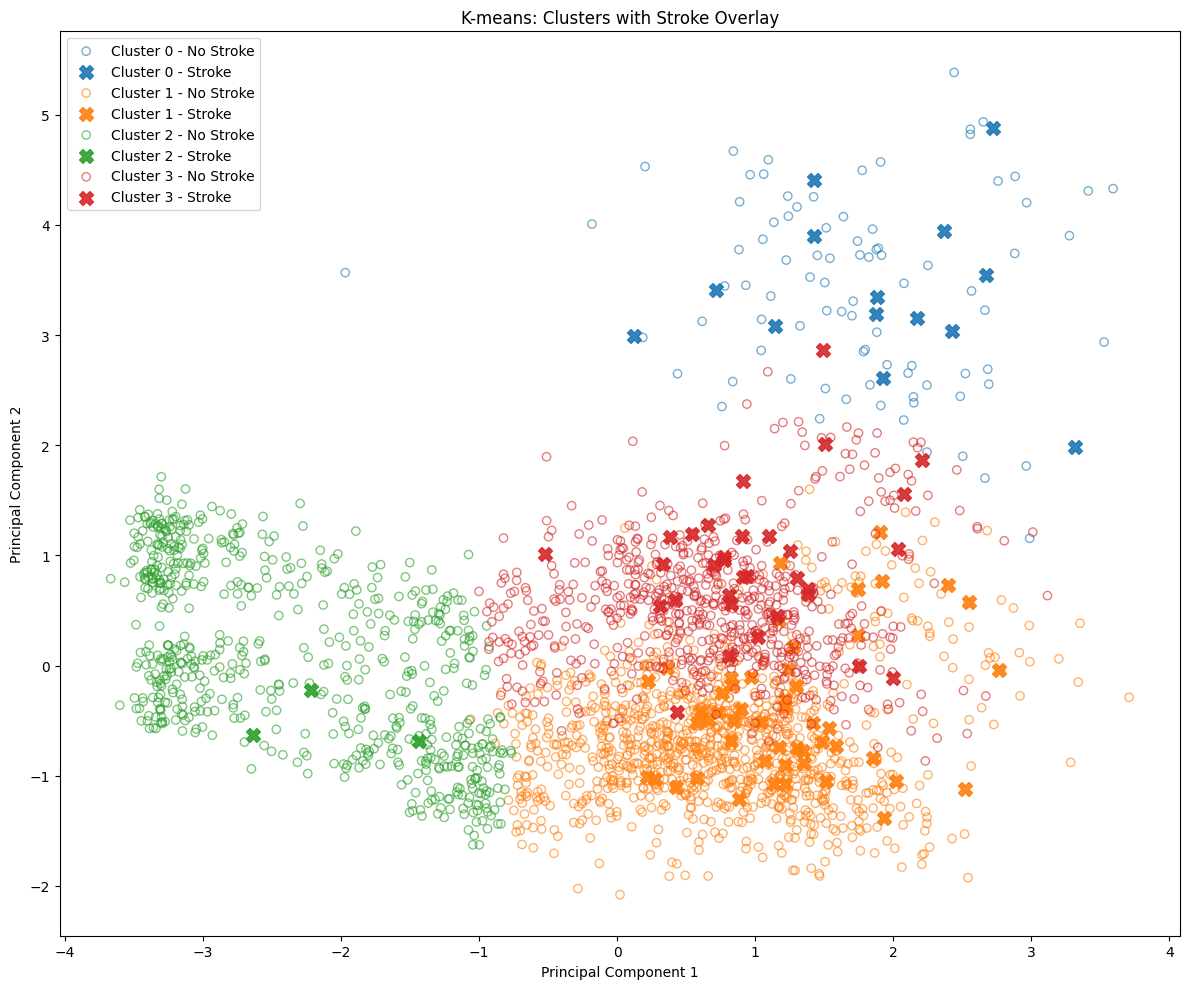

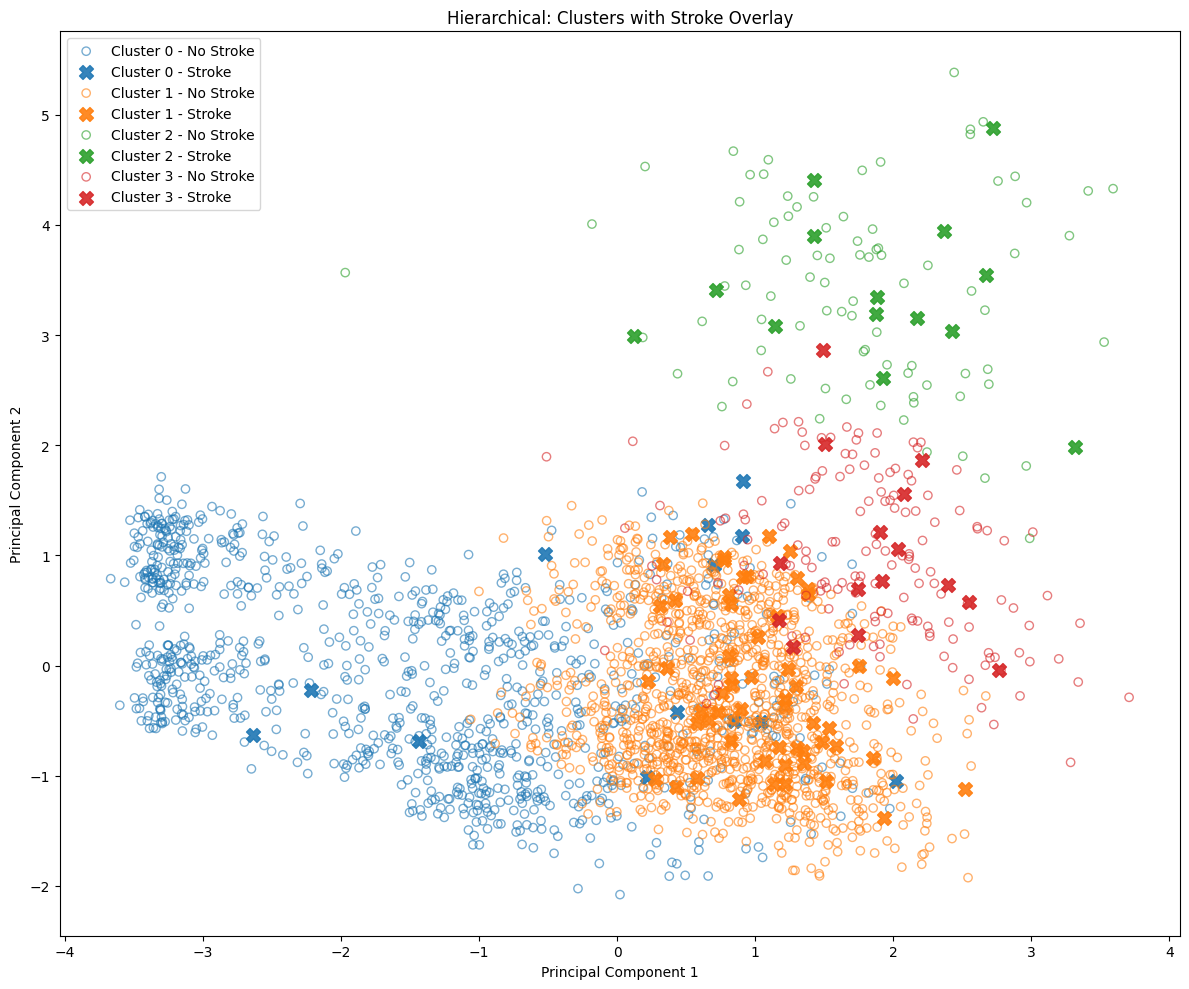

In [ ]:
# Function to visualize clusters and true labels using PCA
def visualize_clusters_with_true_labels(X_scaled, cluster_labels, true_labels, method_name):
    # Overlay view - show strokes within clusters
    plt.figure(figsize=(12, 10))
    
    for cluster in set(cluster_labels):
        # Get points for this cluster
        cluster_mask = cluster_labels == cluster
        
        # Non-stroke cases (hollow)
        non_stroke = X_pca[cluster_mask & (true_labels == 0)]
        plt.scatter(non_stroke[:, 0], non_stroke[:, 1], 
                   edgecolor=f'C{cluster}', facecolors='none', alpha=0.6,
                   label=f'Cluster {cluster} - No Stroke')
        
        # Stroke cases (filled with X)
        stroke = X_pca[cluster_mask & (true_labels == 1)]
        if len(stroke) > 0:  # Only plot if there are stroke cases
            plt.scatter(stroke[:, 0], stroke[:, 1], 
                       color=f'C{cluster}', marker='X', s=100, alpha=0.9,
                       label=f'Cluster {cluster} - Stroke')
    
    plt.title(f'{method_name}: Clusters with Stroke Overlay')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize both clustering methods
visualize_clusters_with_true_labels(X_train_scaled, kmeans_labels, y_train.values, 'K-means')
visualize_clusters_with_true_labels(X_train_scaled, hier_labels, y_train.values, 'Hierarchical')